In [1]:
import pandas as pd
import mysql.connector as mysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuração da conexão com o banco de dados
config = {
  'user': 'root',
  'password': 'Database@2023',
  'host': 'localhost',
  'database': 'csgo'
}

# Conexão com o banco de dados
cnx = mysql.connect(**config)

In [3]:
# Criação do cursor
cursor = cnx.cursor()

# Consulta para selecionar todos os dados da tabela
query_players = "SELECT * FROM players"
query_picks = "SELECT * FROM picks"
query_economy = "SELECT * FROM economy"
query_results = "SELECT * FROM results"

# Execução da consulta
cursor.execute(query_players)

# Obtenção dos resultados
players = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_players = [desc[0] for desc in cursor.description]

# Execução da consulta
cursor.execute(query_picks)

# Obtenção dos resultados
picks = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_picks = [desc[0] for desc in cursor.description]

# Execução da consulta
cursor.execute(query_economy)

# Obtenção dos resultados
economy = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_economy = [desc[0] for desc in cursor.description]

# Execução da consulta
cursor.execute(query_results)

# Obtenção dos resultados
results = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_results = [desc[0] for desc in cursor.description]

# Fechamento do cursor e da conexão
cursor.close()
cnx.close()

In [4]:
# Conversão dos resultados em um DataFrame do Pandas
df_players = pd.DataFrame(players, columns=col_names_players)
df_picks = pd.DataFrame(picks, columns=col_names_picks)
df_economy = pd.DataFrame(economy, columns=col_names_economy)
df_results = pd.DataFrame(results, columns=col_names_results)

In [5]:
df_players.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,-1,72.5,80.0,0.93,7,9,-2,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,3,79.5,53.3,1.12,4,8,-4,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,1,81.5,63.6,1.03,9,9,0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,0,67.2,66.7,0.97,1,9,-8,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,-1,72.9,81.8,0.96,8,7,1,56.3,80.0,0.99


In [6]:
df_picks.head()

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system_,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage\r
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass\r
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno\r
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage\r
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2\r


In [7]:
df_economy.head()

,date,match_id,event_id,team_1,team_2,best_of,map,t1_start,t2_start,1_t1,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,...,0,0,0,0,0,0,0,0,0,\r
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,\r
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,...,0,0,0,0,0,0,0,0,0,\r
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,...,1.0,0,0,0,0,0,0,0,0,\r
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,...,1.0,0,0,0,0,0,0,0,0,\r


In [8]:
df_results.head()

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2\r
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2\r
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2\r
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2\r
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2\r


De acordo com a matéria do GE (https://ge.globo.com/esports/csgo/noticia/2022/08/21/10-anos-de-csgo-relembre-os-melhores-de-cada-ano.ghtml), os melhores jogadores de cada ano do CSGO competitivo são:

- 2015 - olofmeister
- 2016 - coldzera
- 2017 - coldzera
- 2018 - s1mple
- 2019 - ZywOo
- 2020 - ZywOo

Com isso, iremos analisar a performance individual de cada jogador nos seus respectivos anos, comparando um com o outro para analisarmos as diferenças de cada ano.

In [18]:
# Adicionar coluna de ano
df_players['year'] = pd.DatetimeIndex(df_players['date']).year

# Filtrar dados para anos desejados
start_year = 2010
end_year = 2020
df_players_filtered = df_players[(df_players['year'] >= start_year) & (df_players['year'] <= end_year)]

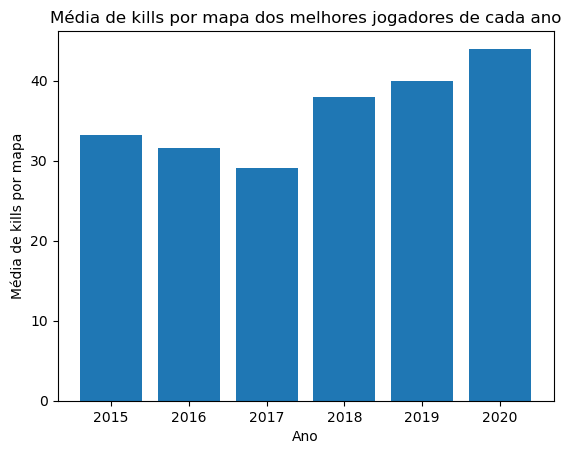

In [19]:
# Selecionando os dados dos jogadores específicos
df_olof = df_players.loc[(df_players['player_name'] == 'olofmeister') & (df_players['year'] == 2015)]
df_cold1 = df_players.loc[(df_players['player_name'] == 'coldzera') & (df_players['year'] == 2016)]
df_cold2 = df_players.loc[(df_players['player_name'] == 'coldzera') & (df_players['year'] == 2017)]
df_s1mple = df_players.loc[(df_players['player_name'] == 's1mple') & (df_players['year'] == 2018)]
df_zywoo1 = df_players.loc[(df_players['player_name'] == 'ZywOo') & (df_players['year'] == 2019)]
df_zywoo2 = df_players.loc[(df_players['player_name'] == 'ZywOo') & (df_players['year'] == 2020)]

# Calculando a média de pontos por mapa em cada ano
olof_mean = df_olof['kills'].mean()
cold1_mean = df_cold1['kills'].mean()
cold2_mean = df_cold2['kills'].mean()
s1mple_mean = df_s1mple['kills'].mean()
zywoo1_mean = df_zywoo1['kills'].mean()
zywoo2_mean = df_zywoo2['kills'].mean()

# Criando a lista com as médias de kills por mapa em cada ano
medias = [olof_mean, cold1_mean, cold2_mean, s1mple_mean, zywoo1_mean, zywoo2_mean]

# Criando a lista com os anos
anos = [2015, 2016, 2017, 2018, 2019, 2020]

# Criando o gráfico de barras
plt.bar(anos, medias)

# Adicionando título e labels aos eixos
plt.title('Média de kills por mapa dos melhores jogadores de cada ano')
plt.xlabel('Ano')
plt.ylabel('Média de kills por mapa')

# Exibindo o gráfico
plt.show()


Temos alguns pontos a se observar:

- Um mapa tem 30 rounds.
- Apenas Coldzera em 2017 fez uma media menor do que 30 kills por partida no ano em que foi o melhor jogador. O restante dos jogadores fizeram uma media de no minimo 1 kill por round do mapa, que é um dado muito alto e dificil de se alcançar.
- Com este gráfico podemos ver como houve um aumento entre os anos de 2018 e 2020 na média dos kills por mapa entre os melhores daquele respectivo ano. Aumentando ainda mais as espectativas para os próximos anos.